<a href="https://colab.research.google.com/github/Thayrov/SKLearnForML/blob/main/SKLearnForML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 1: Introducción a la clasificación

##Proyecto 1

##Entrenamiento y prueba de un modelo de clasificación

In [143]:
# features 1 = si y 0 = no
# tiene el pelo largo?
# tiene las uñas afiladas?
# hace miau?

perro1 = [0,1,1]
perro2 = [1,0,1]
perro3 = [1,1,1]
gato1 = [0,1,0]
gato2 = [0,1,1]
gato3 = [1,1,0]

datos = [perro1, perro2, perro3, gato1, gato2, gato3]
clases = [1,1,1,0,0,0]

In [144]:
from sklearn.svm import LinearSVC
#https://scikit-learn.org/stable/

model = LinearSVC()
model.fit(datos,clases)

LinearSVC()

LinearSVC()

In [145]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [146]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]
pruebas = [misterio1, misterio2, misterio3]
clase_pruebas = [0,1,1]

In [147]:
previsiones = model.predict(pruebas)
previsiones

array([1, 0, 1])

In [148]:
correctos = (previsiones == clase_pruebas).sum()
total = len(pruebas)
tasa_de_acierto = correctos / total
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100, 2)}%')

La tasa de acierto fue de: 33.33%


In [149]:
from sklearn.metrics import accuracy_score

tasa_de_acierto = accuracy_score(clase_pruebas, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100, 2)}%')

La tasa de acierto fue de: 33.33%


##Estandarización de nombres

In [150]:
x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

model.fit(x_train,y_train)

LinearSVC()

In [151]:
x_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

previsiones = model.predict(x_test)

from sklearn.metrics import accuracy_score

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100, 2)}%')

La tasa de acierto fue de: 33.33%


# Clase 2: Lectura y manipulación de datos

##Lectura y manipulación de datos

In [152]:
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'

import pandas as pd
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
46,1,0,1,1
35,1,0,1,1
60,1,0,1,1
42,0,1,0,0
49,1,1,0,0


In [153]:
mapa = {
          "home":"principal",
          "how_it_works":"como_funciona",
          "contact":"contacto",
          "bought":"compro"
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
78,0,0,1,0
91,1,1,0,0
27,1,0,1,1


In [154]:
x = datos[['principal','como_funciona','contacto']]
y = datos.compro
datos.shape

(99, 4)

In [155]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [156]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

Entrenaremos con 75 elementos y probaremos con 24 elementos.


In [157]:
model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 95.83%


In [158]:
from sklearn.model_selection import train_test_split

SEED=42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


##Estratificando splits

In [159]:
y_train.value_counts()

0    50
1    24
Name: compro, dtype: int64

In [160]:
24/75
25/75

0.3333333333333333

In [161]:
y_test.value_counts()

0    16
1     9
Name: compro, dtype: int64

In [162]:
9/24
8/24

0.3333333333333333

In [163]:
#Agregando parametro stratify
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED, stratify=y)

print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


# Clase 3: Modelo baseline

##Probando en dos dimensiones

In [164]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

datos = pd.read_csv(uri)
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [165]:
mapa = {
        'unfinished':'no_finalizado',
        'expected_hours':'horas_esperadas',
        'price':'precio'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,no_finalizado,horas_esperadas,precio
1503,0,34,391
1322,0,87,11699
217,1,24,176


In [166]:
cambio = {1:0, 0:1}

datos['finalizado'] = datos.no_finalizado.map(cambio)
datos.sample(3)

,no_finalizado,horas_esperadas,precio,finalizado
324,1,6,161,0
1343,0,26,233,1
63,1,84,2902,0


In [167]:
datos.shape

(2157, 4)

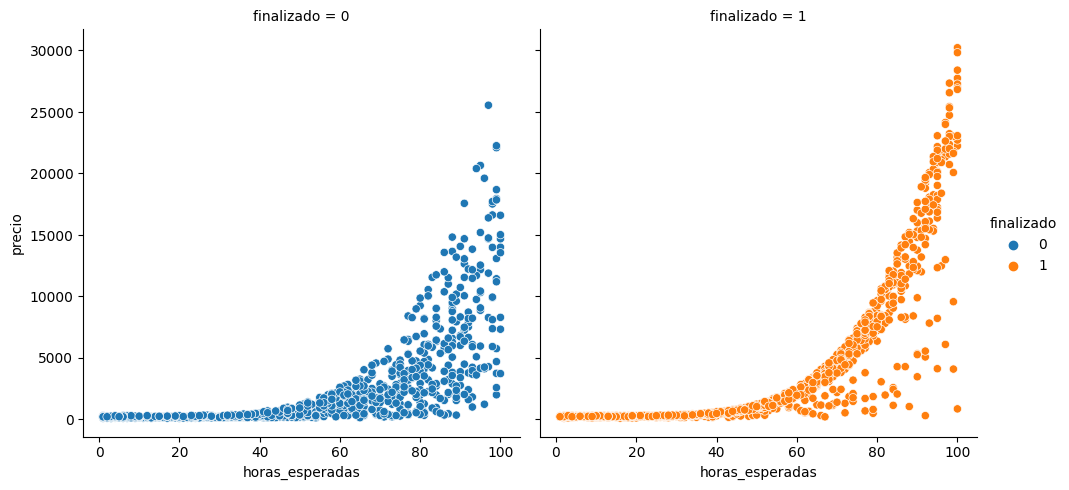

In [168]:
import seaborn as sns
sns.relplot(x='horas_esperadas', y='precio', hue='finalizado', data=datos, col='finalizado')

In [169]:
import numpy as np

x= datos[['horas_esperadas','precio']]
y= datos.finalizado

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 57.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##Curva de decisión


In [170]:
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

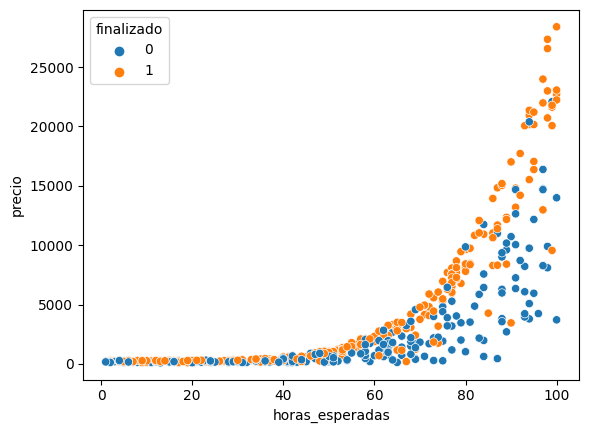

In [171]:
sns.scatterplot(x='horas_esperadas', y='precio', hue=y_test, data=x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


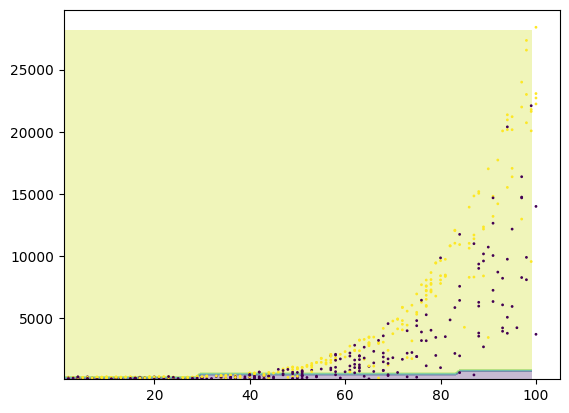

In [172]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

pixels = 100

eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(puntos)
Z = Z.reshape(xx.shape)
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)

# Clase 4: Estimadores no lineales

##Estimadores no lineales

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 67.78%


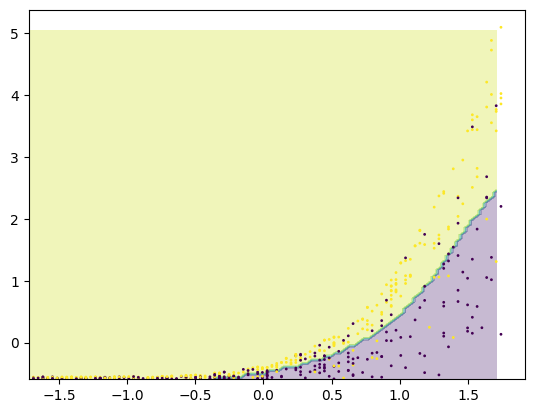

In [173]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x= datos[['horas_esperadas','precio']]
y= datos.finalizado

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

# Clase 5: Dummy classifiers y Árboles de decisión

##Trabajando en un nuevo proyecto

In [174]:
from datetime import datetime

uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'
datos = pd.read_csv(uri)

mapa = {
        'mileage_per_year':'millas_por_ano',
        'model_year':'ano_del_modelo',
        'price':'precio',
        'sold':'vendido'
        }

datos = datos.rename(columns=mapa)


cambio = {'no':0, 'yes':1}
datos.vendido = datos.vendido.map(cambio)


ano_actual = datetime.today().year
datos['edad_del_modelo'] = ano_actual - datos.ano_del_modelo


datos['km_por_ano'] = (datos.millas_por_ano * 1.60934).round(2)

datos = datos.drop(columns=['Unnamed: 0', 'millas_por_ano','ano_del_modelo'], axis=1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_ano
4062,91492.55,0,22,20783.02
338,77450.66,0,21,21203.05
7900,70029.90,0,19,15327.35


##Dummy classifier y SVC

In [175]:
x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 76.0%


In [176]:
from sklearn.dummy import DummyClassifier

strategy='stratified'

dummy = DummyClassifier(strategy = strategy)
dummy.fit(x_train,y_train)

exactitud = dummy.score(x_test,y_test)*100

print(f'La exactitud del clasificador Dummy {strategy} fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 52.64%


In [177]:
strategy='most_frequent'

dummy = DummyClassifier(strategy = strategy)
dummy.fit(x_train,y_train)

exactitud = dummy.score(x_test,y_test)*100

print(f'La exactitud del clasificador Dummy {strategy} fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


##Árboles de decisión y visualización de reglas de decisión


In [180]:
# Usando StandardScaler()

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


In [179]:
# Sin estandarizar
x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


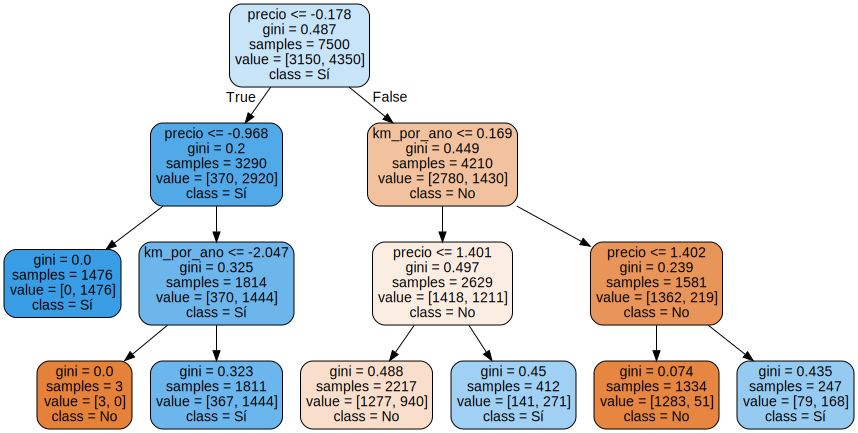

In [182]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Sí'])
grafico = graphviz.Source(dot_data)
grafico